<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF285 - Computación Científica </h1>
    <h2> Tarea 3 - Código Base</h2>
    <h2> [S]cientific [C]omputing [T]eam </a> </h2>
    <h2> Version: 2.00</h2>
</center>

# Contexto


El elipsoide rotado es una superficie curva cerrada cuyas tres secciones ortogonales principales son elípticas, es decir, son originadas por planos que contienen dos ejes cartesianos cada plano. Como se observa en el siguiente gráfico.

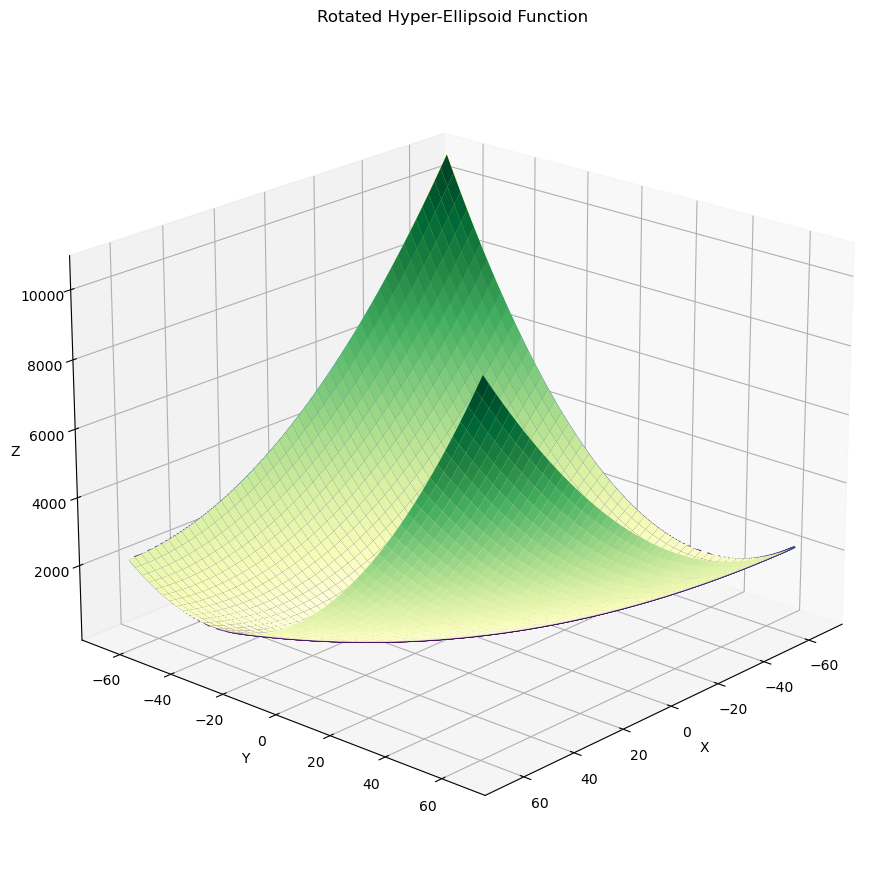
 
En esta tarea usted analizará la siguiente ecuación de un elipsoide sujeta a un parámetro $\lambda$, para observar el comportamiento de las iteraciones al aplicar los distintos métodos de resolución de sistemas de ecuaciones lineales vistos en clases.

Sea $\lambda>0$ y $f:\mathbb{R}^2 \rightarrow \mathbb{R}$ definido por 

$$
    f(x,y) = \frac{1}{2}x^2 + \frac{\lambda}{2}y^2 + xy \ \ \forall \ x,y \in \mathbb{R}
$$


# Librerías (no utilizar liberías adicionales)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<div class="alert alert-block alert-danger"><b> No debe utilizar np.linalg.inv en su desarrollo para el calculo de las matrices inversas</b>
</div>

# Desarrollo

## Pregunta 1 (10 puntos): Análisis de la función

Hacer gráficos de la función para distintos valores del parámetro $\lambda$ y responder las siguientes preguntas:

- Gráficamente ¿Cuál es el mínimo o máximo de la función?
- ¿Qué ocurre con la función cuando el valor de $\lambda$ varía?


Para esta pregunta debe completar la función graficar_3d con la función $f(x,y)$ entregada en el enunciado, luego puede utilizarla con distintos valores de lambda para obtener los gráficos

In [2]:
def graficar_3d(lam):
    def f(x,y,lam):
        """
        Parameters
        ----------
        x    :float array
                x value
        y    :float array
                y value
        lam  :float
                lambda value
        Returns
        -------
        f_x   :float
                value of function f
        """
        #Aquí va su código
        
        f_x = (1/2)*np.power(x,2)+(lam/2)*np.power(y,2)+x*y
        
        return f_x
    
    #No modificar las siguientes lineas
    x1= np.linspace(-65.536,65.536,500)
    x2= np.linspace(-65.536,65.536,500)
    r_min,r_max=-65.536,65.536
    x1,x2=np.meshgrid(x1,x2)
    results=f(x1,x2,lam)
    figure=plt.figure(figsize=(9,9))
    axis = plt.axes(projection="3d")
    axis.set_title('Rotated Hyper-Ellipsoid Function')
    axis.contour3D(x1, x2, results,450)
    axis.plot_surface(x1,x2,results)
    axis.view_init(21,42)
    axis.set_xlabel('X')
    axis.set_ylabel('Y')
    axis.set_zlabel('Z')
    plt.show()

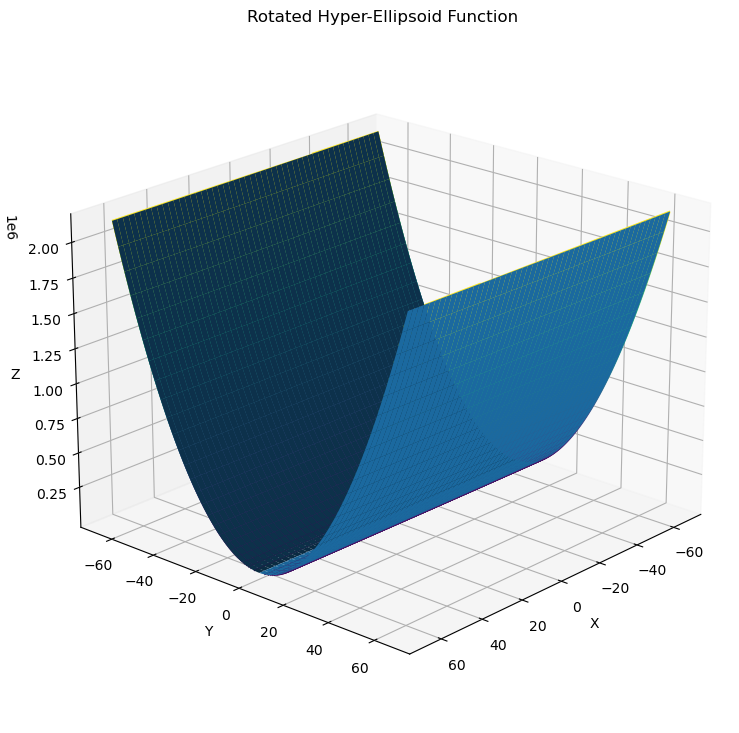

In [3]:
graficar_3d(1000)

1. Gráficamente ¿Cuál es el mínimo o máximo de la función?   
A medida que aumenta $\lambda$ se puede ver que el mínimo se encuentra en $y=0$ al tener una forma de función cuadrática en los ejes $y, z$ independientemente del valor que tome $x$.
<br><br>
2. ¿Qué ocurre con la función cuando el valor de  𝜆 varía?  
Cuando el valor de $\lambda$ varía, el mínimo se encuentra en $y=0$ y el eje $z$ va aumentando hacia los números positivos a la vez que $\lambda$ aumenta.

## Pregunta 2 (30 puntos): Newton en $\mathbb{R}^n$

El objetivo es encontrar el mínimo de la función $f(x,y)$, para ello se le pide encontrar una iteración con el método de Newton para $\mathbb{R}^n$, es decir, llegar a una expresión de la forma:

$$
    x_{i+1} = x_i - J^{-1}(x_i) F(x_i)
$$

Donde se busca resolver $F(x) = 0$, para $F: \mathbb{R}^n \rightarrow \mathbb{R}^n$ una función diferenciable, con $J^{-1}(x_i)$ la matriz Jacobiana inversa de $F$ evaluada en el punto $x_i$

### 2.1 (15 puntos) Desarrollo
Escriba aquí el desarrollo que realizó para obtener la iteración del método de Newton



**Solución:** 
<br><br>
Primero se deben definir $F(x)$ y $J(x)$. Como se busca encontrar el mínimo de la función $f(x, y)$, se deriva $f$ respecto a $x$ y respecto a $y$ para así poder encontrar los valores en donde la función tiene su mínimo ($F(x)=0$). Por lo tanto, el $F(x)$ corresponde a:<br>
$$
F(x) = 
\left(\begin{array}{cc} 
x + y\\
\lambda y + x
\end{array}\right)
= 0
$$
Luego, para obtener $J(x)$ se deriva cada función de $F(x)$ por $x$ y por $y$, obteniendo lo siguiente:
$$
J(x) = 
\left(\begin{array}{cc} 
1 & 1\\
1 & \lambda
\end{array}\right)
$$
Ahora falta obtener $J^{-1}(x)$, lo cual al ser una matriz de 2x2 se puede conseguir de la siguiente manera:<br>
$$
A =
\left(\begin{array}{cc} 
a & b\\
c & d
\end{array}\right)
$$
<br>
$$det(A) = a*d-b*c$$
<br>
$$
A^{-1} =
{1 \over{det(A)}}
\left(\begin{array}{cc} 
d & -b\\
-c & a
\end{array}\right)
$$
<br>
Referencia: https://www.matesfacil.com/calculadoras/matrices/calculadora-online-matriz-inversa-adjunta-2x2-3x3-matrices.html
<br>
Finalmente, se tiene que $J^{-1}(x)$ es:
$$
J^{-1}(x)=
{1 \over{\lambda - 1}}
\left(\begin{array}{cc} 
\lambda & -1\\
-1 & 1
\end{array}\right)
$$
Con esto ya tenemos la iteración del método de Newton:
$$
x_{i+1} = x_i -
{1 \over{\lambda - 1}}
\left(\begin{array}{cc} 
\lambda & -1\\
-1 & 1
\end{array}\right)
\left(\begin{array}{cc} 
x_{i} + y_{i}\\
\lambda y_{i} + x_{i}
\end{array}\right)
$$

### 2.2 (15 puntos) Implementación

Se le pide implementar las siguientes funciones

- **J_inv(x,ld)**, la cual calcula la inversa del Jacobiano $J^{-1}(x)$ dado un valor de $x \in \mathbb{R}^2$ y un valor *ld* que corresponde al parámetro $\lambda$.
- **F(x,ld)**, la cual calcula la función $F(x)$ para un valor de $x \in \mathbb{R}^2$ y un valor *ld* que corresponde al parámetro $\lambda$.
- **newton_rhapson(ld, x0, n_iter, J_inv, F)**, la cual realiza las iteraciones del método de Newton, entregando un arreglo con los valores de $x$ en cada iteración, es decir, $x[n]$ es el valor en la n-ésima iteración . Esta función recibe un punto inicial $x_0$ en $\mathbb{R}^2$, las funciones $J^{-1}(x)$ y $F(x)$, una variable *ld* que corresponde al parámetro $\lambda$ y una cantidad de iteraciones.




In [4]:
def J_inv(x, ld):
    """
    Parameters
    ---------- 
    x        :  float array
                value for x,y
    ld       :  float
                value of parameter lambda
    Returns
    -------
    J_inv     : float array
                value of the inverse             
    """
    
    det = ld - 1
    J_inv = (1/det)*np.array([[ld, -1], [-1, 1]])
    
    return J_inv

def F(x, ld):
    """
    Parameters
    ---------- 
    x       :  float array
                value for x,y
    ld      :  float
                value of parameter lambda
    Returns
    -------
    F       : float array
                value of the function F(x)           
    """
    
    F = np.array([x[0] + x[1], ld*x[1] + x[0]])
    
    return F
    
def newton_rhapson(ld,x0, n_iter, J_inv,F):
    """
    Parameters
    ---------- 
    x0        : float array
                Initial value for x,y
    J_inv     : function
                Function to evaluate inverse of Jacobian of F
    F         : function
                Function to evaluate F
    ld      :  float
                value of parameter lambda
    n_iter   : int
                Number of iterations
    Returns
    -------
    x      : float array
             value of x during iterations
    """
    
    x = np.zeros((n_iter, 2, 1))
    x[0] = x0
    
    for i in range(n_iter-1):
        x0 = x0 - np.dot(J_inv(x0, ld), F(x0, ld))
        x[i+1] = x0

    return x

In [5]:
#Valor de prueba
newton_rhapson(10, np.random.rand(2,1), 50, J_inv,F)

array([[[ 4.20226712e-01],
        [ 5.74918813e-01]],

       [[-1.11022302e-16],
        [ 1.11022302e-16]],

       [[ 0.00000000e+00],
        [ 0.00000000e+00]],

       [[ 0.00000000e+00],
        [ 0.00000000e+00]],

       [[ 0.00000000e+00],
        [ 0.00000000e+00]],

       [[ 0.00000000e+00],
        [ 0.00000000e+00]],

       [[ 0.00000000e+00],
        [ 0.00000000e+00]],

       [[ 0.00000000e+00],
        [ 0.00000000e+00]],

       [[ 0.00000000e+00],
        [ 0.00000000e+00]],

       [[ 0.00000000e+00],
        [ 0.00000000e+00]],

       [[ 0.00000000e+00],
        [ 0.00000000e+00]],

       [[ 0.00000000e+00],
        [ 0.00000000e+00]],

       [[ 0.00000000e+00],
        [ 0.00000000e+00]],

       [[ 0.00000000e+00],
        [ 0.00000000e+00]],

       [[ 0.00000000e+00],
        [ 0.00000000e+00]],

       [[ 0.00000000e+00],
        [ 0.00000000e+00]],

       [[ 0.00000000e+00],
        [ 0.00000000e+00]],

       [[ 0.00000000e+00],
        [ 0.00000000e

## Pregunta 3 (20) puntos): Jacobi y Gauss-Seidel

A continuación se utilizarán los métodos de Jacobi y Gauss-Seidel con el objetivo de encontrar los mínimos de la función $f(x,y)$ del enunciado. Para ello, usted debe plantear el problema como un sistema de ecuaciones lineales, es decir, de la forma $Ax=b$.

### 3.1 (10 puntos) Sistema de ecuaciones lineales
Escriba aquí su desarrollo para plantear el problema en su forma $Ax=b$

**Solución:**  
Para encontrar los mínimos de la función se tienen las dos funciones encontradas en las preguntas anteriores, las cuales se obtienen al derivar la función $f$ respecto a $x$ e $y$ para poder encontrar los mínimos. Estas funciones corresponden a:
<br>
$$f_{1}(x)=\frac{\partial f(x, y)}{\partial x} = x + y$$
<br>
$$f_{2}(x)=\frac{\partial f(x, y)}{\partial y} = \lambda y + x$$
<br>
Para encontrar los mínimos se igualan las derivadas a 0, por lo que el vector b del problema corresponde a:
<br>
$$b=
\left(\begin{array}{cc} 
0\\
0
\end{array}\right)
$$
Por lo tanto, el problema en su forma $Ax=b$ es:
$$
\left(\begin{array}{cc} 
1 & 1\\
1 & \lambda
\end{array}\right)
\left(\begin{array}{cc} 
x\\
y
\end{array}\right)
=
\left(\begin{array}{cc} 
0\\
0
\end{array}\right)
$$

### 3.2 (5 puntos) Implementación del método de Jacobi

Se pide implementar la función **jacobi(ld, x0, n_iter, b)**  la cual realiza la iteración con el método de Jacobi, entregando un arreglo con los valores de $x$ en cada iteración, es decir, $x[n]$ es el valor en la n-ésima iteración. Esta función recibe un punto inicial $x_0$ en $\mathbb{R}^2$, una variable *ld* que corresponde al parámetro $\lambda$, una cantidad de iteraciones y un arreglo del vector $b$ 

In [6]:
def jacobi(ld,x0,n_iter, b):
    """
    Parameters
    ---------- 
    x0        : float array
                Initial value for x,y
    b         : float array
                value of array b
    ld      :  float
                value of parameter lambda
    n_iter   : int
                Number of iterations
    Returns
    -------
    x      : float array
             value of array x during iterations
    """
    
    L = np.array([[0, 0], [1, 0]])
    D = np.array([[1, 0], [0, ld]])
    U = np.array([[0, 1], [0, 0]])
    x = np.zeros((n_iter, 2, 1))
    x[0] = x0
    D_inv = np.array([[1, 0], [0, 1/ld]])
    
    for i in range(n_iter-1):
        x0 = np.dot(D_inv, (b-np.dot((L+U), x0)))
        x[i+1] = x0

    return x

In [7]:
#Valor de prueba
jacobi(10,np.random.rand(2,1), 50, np.zeros((2,1)))

array([[[ 7.79111196e-01],
        [ 5.51811457e-01]],

       [[-5.51811457e-01],
        [-7.79111196e-02]],

       [[ 7.79111196e-02],
        [ 5.51811457e-02]],

       [[-5.51811457e-02],
        [-7.79111196e-03]],

       [[ 7.79111196e-03],
        [ 5.51811457e-03]],

       [[-5.51811457e-03],
        [-7.79111196e-04]],

       [[ 7.79111196e-04],
        [ 5.51811457e-04]],

       [[-5.51811457e-04],
        [-7.79111196e-05]],

       [[ 7.79111196e-05],
        [ 5.51811457e-05]],

       [[-5.51811457e-05],
        [-7.79111196e-06]],

       [[ 7.79111196e-06],
        [ 5.51811457e-06]],

       [[-5.51811457e-06],
        [-7.79111196e-07]],

       [[ 7.79111196e-07],
        [ 5.51811457e-07]],

       [[-5.51811457e-07],
        [-7.79111196e-08]],

       [[ 7.79111196e-08],
        [ 5.51811457e-08]],

       [[-5.51811457e-08],
        [-7.79111196e-09]],

       [[ 7.79111196e-09],
        [ 5.51811457e-09]],

       [[-5.51811457e-09],
        [-7.79111196e

### 3.3 (5 puntos) Implementación del método de Gauss-Seidel

Se pide implementar la función **gauss_seidel**  la cual realiza la iteración con el método de Gauss-Seidel, entregando un arreglo con los valores de $x$ en cada iteración, es decir, $x[n]$ es el valor en la n-ésima iteración. Esta función recibe un punto inicial $x_0$ en $\mathbb{R}^2$, una variable *ld* que corresponde al parámetro $\lambda$, una cantidad de iteraciones y un arreglo del vector $b$ 

In [8]:
def gauss_seidel(ld, x0, n_iter, b):
    """
    Parameters
    ---------- 
    x0        : float array
                Initial value for x,y
    b         : float array
                value of array b
    ld      :  float
                value of parameter lambda
    n_iter   : int
                Number of iterations
    Returns
    -------
    x      : float array
             value of array x during iterations
    """
    
    L = np.array([[0, 0], [1, 0]])
    D = np.array([[1, 0], [0, ld]])
    U = np.array([[0, 1], [0, 0]])
    x = np.zeros((n_iter, 2, 1))
    x[0] = x0
    inv = np.dot(1/(ld-1), np.array([[ld, 0], [-1, 1]])) # resultado de (L+D)^{-1} calculado como en la pregunta 2.1
    
    for i in range(n_iter-1):
        x0 = np.dot(inv, b-np.dot(U, x0))
        x[i+1] = x0
    
    return x

In [9]:
#Valor de prueba
gauss_seidel(10, np.random.rand(2,1), 50, np.zeros((2,1)))

array([[[ 5.60937395e-01],
        [ 6.92519431e-01]],

       [[-7.69466035e-01],
        [ 7.69466035e-02]],

       [[-8.54962261e-02],
        [ 8.54962261e-03]],

       [[-9.49958068e-03],
        [ 9.49958068e-04]],

       [[-1.05550896e-03],
        [ 1.05550896e-04]],

       [[-1.17278774e-04],
        [ 1.17278774e-05]],

       [[-1.30309749e-05],
        [ 1.30309749e-06]],

       [[-1.44788610e-06],
        [ 1.44788610e-07]],

       [[-1.60876233e-07],
        [ 1.60876233e-08]],

       [[-1.78751370e-08],
        [ 1.78751370e-09]],

       [[-1.98612633e-09],
        [ 1.98612633e-10]],

       [[-2.20680704e-10],
        [ 2.20680704e-11]],

       [[-2.45200782e-11],
        [ 2.45200782e-12]],

       [[-2.72445313e-12],
        [ 2.72445313e-13]],

       [[-3.02717015e-13],
        [ 3.02717015e-14]],

       [[-3.36352238e-14],
        [ 3.36352238e-15]],

       [[-3.73724709e-15],
        [ 3.73724709e-16]],

       [[-4.15249677e-16],
        [ 4.15249677e

## Pregunta 4 (20 puntos): Experimentos

### 4.1 Obtención Normas (15 puntos)

En esta pregunta se van a comparar los resultados de los 3 métodos implementados. Para ello se pide implementar de forma vectorizada la función *method_norm*, la cual recibe los siguientes parámetros:

- ld: Valor de $\lambda$
- initial val: valor inicial para los métodos iterativos
- n_iter: cantidad de iteraciones a realizar
- b: vector $b$ para los métodos de jacobi y gauss-seidel
- J_inv: Función que calcular la inversa del jacobiano para el método de newton
- F: función a resolver con el método de newton

La función debe retornar 3 numpy array (jacobi_norm, newton_norm, gauss_norm) que obtienen la norma del vector x que retornan los métodos implementados en las preguntas anteriores. Por ejemplo, jacobi_norm es un np.array que se obtiene al aplicar la norma a cada uno de los valores del vector x, el cual es el resultado de llamar a la función *newton_rhapson*


<div class="alert alert-block alert-info"><a>puede utilizar la función np.linalg.norm() de numpy </a></div>

In [10]:
def method_norm(ld, initial_val, n_iter, b, J_inv,F):
    """
    Parameters
    ---------- 
    ld           :  float
                    value of parameter lambda
    initial_val  : float array
                    Initial value for x,y
    
    n_iter       : int
                    Number of iterations
    b            : float array
                    value of array b
    J_inv     : function
                Function to evaluate inverse of Jacobian of F
    F         : function
                Function to evaluate F
    Returns
    -------
    jacobi_norm  : float array
                    value of the norm of the array x during jacobi method
    newton_norm  : float array
                    value of the norm of the array x during newton method
    gauss_norm  : float array
                    value of the norm of the array x during gauss-seidel method
    """
    
    #Aquí va su código
    
    jacobi_norm = np.linalg.norm(jacobi(ld, initial_val, n_iter, b))
    newton_norm = np.linalg.norm(newton_rhapson(ld,initial_val, n_iter, J_inv,F))
    gauss_norm = np.linalg.norm(gauss_seidel(ld, initial_val, n_iter, b))
    
    return jacobi_norm,newton_norm, gauss_norm

### 4.2 Experimentos (5 puntos)
A continuación se pide realizar experimentos con los siguientes valores de $\lambda = \{2,10,1000\}$ sobre cada uno de los métodos implementados en las preguntas anteriores. Para ello elija un punto inicial aleatorio e inicialice los métodos desde el mismo punto, con 20 iteraciones.

In [11]:
initial_val = np.random.rand(2, 1)
ld = np.array([2, 10, 1000])
n_iter = 20

#Aquí va su código

b = np.zeros((2, 1))

j = jacobi(ld[0], initial_val, n_iter, b)
n = newton_rhapson(ld[0],initial_val, n_iter, J_inv,F)
g = gauss_seidel(ld[0], initial_val, n_iter, b)

Luego observe cuales son los puntos en la última iteración en cada uno de los métodos

In [12]:
j[-1]

array([[-0.00169939],
       [-0.00062155]])

In [13]:
n[-1]

array([[0.],
       [0.]])

In [14]:
g[-1]

array([[-1.74017285],
       [ 0.87008643]])

In [15]:
method_norm(ld[0], initial_val, n_iter, b, J_inv,F)

(1.6413285902541108, 1.078029236034465, 8.548797216012737)

In [16]:
method_norm(ld[1], initial_val, n_iter, b, J_inv,F)

(1.3937988158403953, 1.078029236034465, 1.4553086091573666)

In [17]:
method_norm(ld[2], initial_val, n_iter, b, J_inv,F)

(1.3853518489831544, 1.078029236034465, 1.385898739012755)

## Pregunta 5 (10 puntos): Conclusiones

Finalmente, se pide que concluya respecto a los resultados obtenidos.

- ¿Qué método obtuvo mejor resultado y por qué?
- ¿Qué ocurre al variar el parámetro $\lambda$? ¿Llegaron los métodos al mínimo esperado?

1. ¿Qué método obtuvo mejor resultado y por qué?  
El método que obtuvo el mejor resultado es el método de Newton, ya que es el que tiene el menor valor de norma y por ende, es el que mejor se acerca a la raíz de la función.
2. ¿Qué ocurre al variar el parámetro  𝜆? ¿Llegaron los métodos al mínimo esperado?  
Al aumentar el $\lambda$ los métodos logran llegar más cerca al mínimo esperado, dependiendo también del valor inicial que se le entregue (aleatorio en este caso).

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=57673af8-dd90-4dbc-a4bd-4284b8b1e209' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>